# PROYECTO: "CRIME ANALYSIS"

Este proyecto tiene como objetivo predecir la categoría del crimen utilizando la fuente de datos suministrada en la cual se ahondará más adelante. El proyecto utiliza como herramienta Python 3.

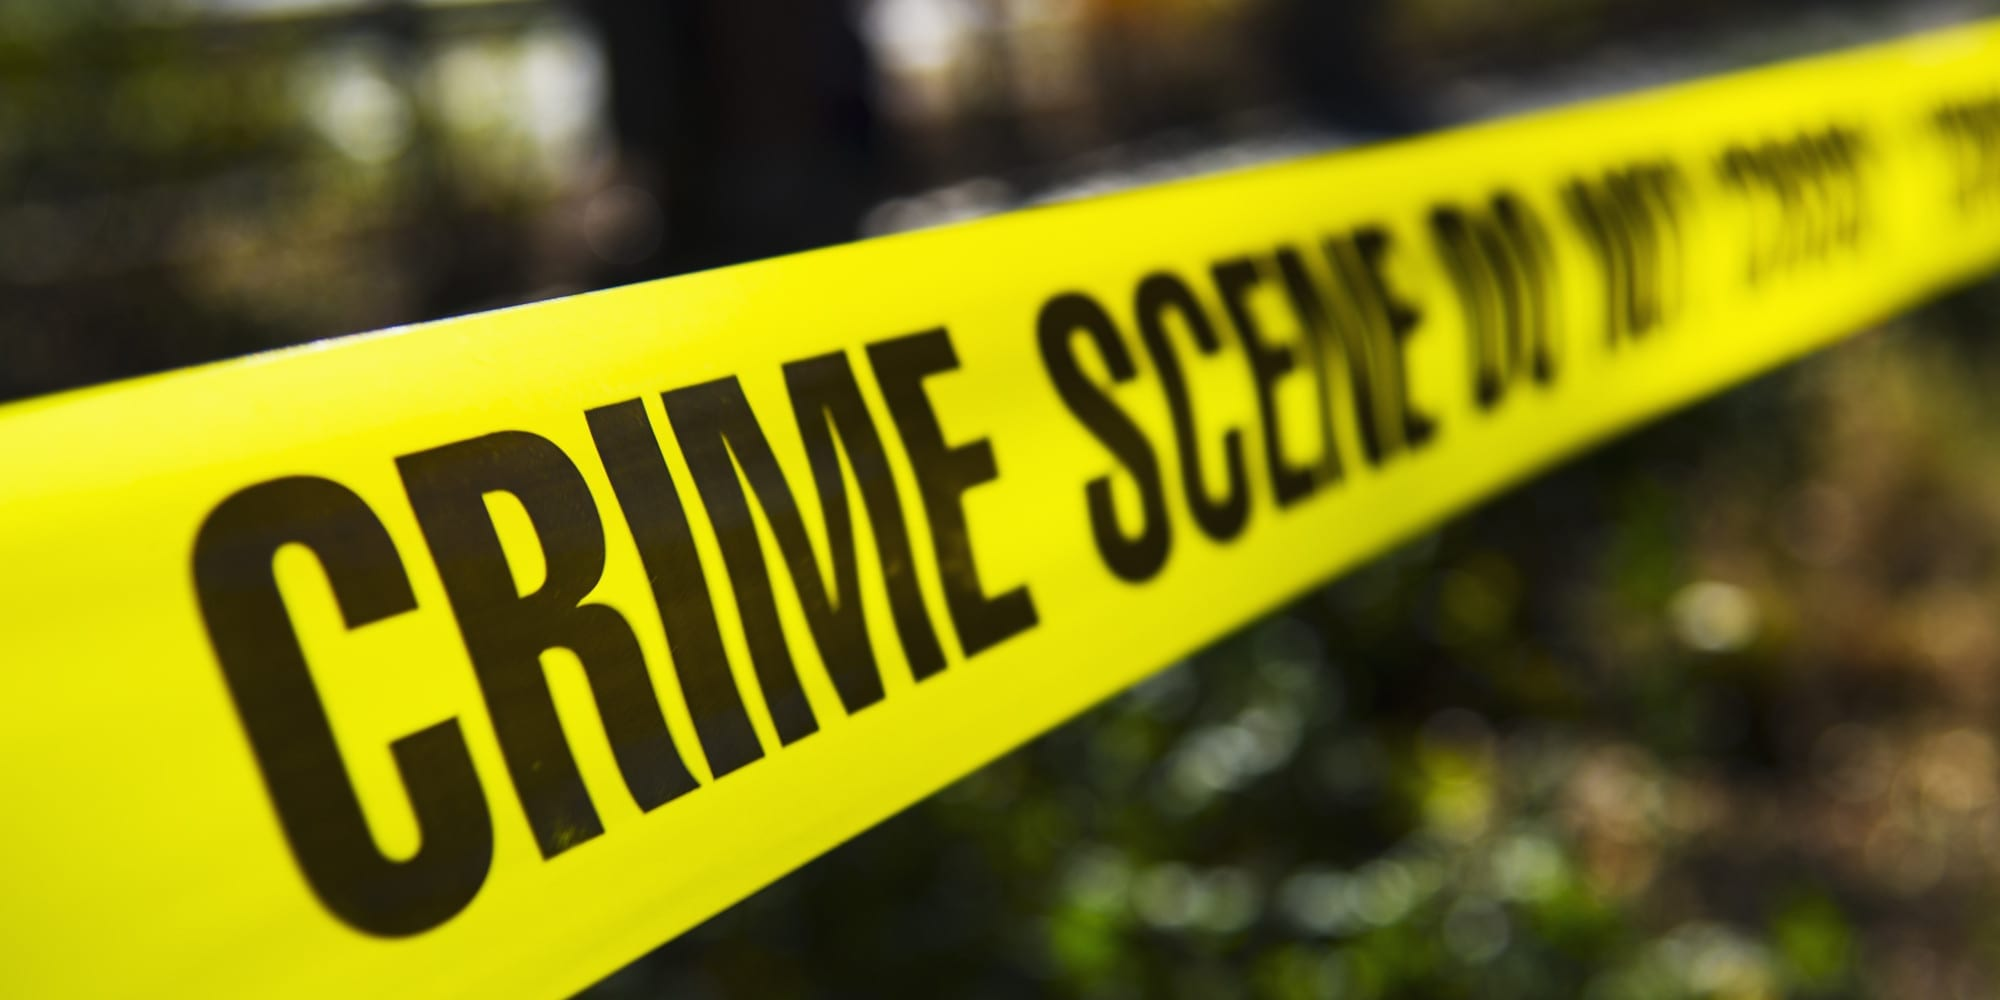

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\b55al\OneDrive\Escritorio\crime.jpg',width="1000", height="300")

## Parte 1: Importando, limpiando y entendiendo los datos

El objetivo en esta sección corresponde a realizar la importación de los datos, limpieza de los datos y el análisis de algunas características en los datos.

* Se procede a la importación de las librerías con las que se trabajarán

In [2]:
# Importación de las librerías necesarias
## Procesamiento de Datos
import pandas as pd
import numpy as np
## Visualización de datos
import matplotlib.pyplot as plt 
import seaborn as sns           
import folium          
## Modelo predictivo
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn import svm
## Medición de resultados
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

* Se procede a importar la fuente de datos con la cual se va a trabajar

In [3]:
df = pd.read_csv(r'C:\Users\b55al\OneDrive\Escritorio\Pruebas\Pruebas\2. Crime Analysis.csv', engine='python')

* Se visualiza una muestra de la información importada

In [4]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


* Se analiza la información del dataframe

In [5]:
# Verificación del tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [6]:
# Verificación de datos nulos
df.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

* Para sacar provecho de la información, se obtienen los datos de la fecha por separado.

In [7]:
# Obtención del formato fecha

df['Date'] = pd.to_datetime(df['Dates'])
df['Month'] = pd.to_datetime(df['Dates']).dt.month
df['Year'] = pd.to_datetime(df['Dates']).dt.year
df['Day'] = pd.to_datetime(df['Dates']).dt.day
df['Hour'] = pd.to_datetime(df['Dates']).dt.hour
del (df['Dates'])

df.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Month,Year,Day,Hour
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,5,2015,13,23
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,5,2015,13,23
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00,5,2015,13,23
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13 23:30:00,5,2015,13,23
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13 23:30:00,5,2015,13,23


In [8]:
# Verificación tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 13 columns):
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
Date          878049 non-null datetime64[ns]
Month         878049 non-null int64
Year          878049 non-null int64
Day           878049 non-null int64
Hour          878049 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 87.1+ MB


* Se describen los datos para tener claridad de la información con la que se trabaja

<!-- Tabla de descripción del dataset-->
<table>
  <colgroup span="4" class="columns"></colgroup>
  <tr>
    <th>Número</th>
    <th>Atributo</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Category</td>
    <td>Catgoría del delito</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Descript</td>
    <td>Descripción del vehículo</td>
  </tr>
  <tr>
    <td>3</td>
    <td>DayOfWeek</td>
    <td>Día de la semana</td>
  </tr>
  <tr>
    <td>4</td>
    <td>PdDistrict</td>
    <td>Región o Sctor</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Resolution</td>
    <td>Rsolución del delito</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Adress</td>
    <td>Dirección</td>
  </tr>
  <tr>
    <td>7</td>
    <td>X</td>
    <td>Latitud</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Y</td>
    <td>Longitud</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Date</td>
    <td>Fecha registrada del delito</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Month</td>
    <td>Mes de la fecha</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Year</td>
    <td>Año de la fecha</td>
  </tr>
  <tr>
    <td>12</td>
    <td>Day</td>
    <td>Día de la fecha</td>
  </tr>
  <tr>
    <td>13</td>
    <td>Hour</td>
    <td>Hora de la fecha</td>
  </tr>
 
</table>

* Se realiza un primer análisis de los datos obteniendo su información estadística

In [9]:
# Información estadística datos numéricos
df.describe()

,X,Y,Month,Year,Day,Hour
count,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
mean,-122.422616,37.771020,6.436509,2008.712046,15.570623,13.412655
std,0.030354,0.456893,3.428972,3.631194,8.783005,6.549573
min,-122.513642,37.707879,1.000000,2003.000000,1.000000,0.000000
25%,-122.432952,37.752427,3.000000,2006.000000,8.000000,9.000000
50%,-122.416420,37.775421,6.000000,2009.000000,16.000000,14.000000
75%,-122.406959,37.784369,9.000000,2012.000000,23.000000,19.000000
max,-120.500000,90.000000,12.000000,2015.000000,31.000000,23.000000


    * Se observan que los datos van desde el 2003 al 2015

In [10]:
df[['Category','Descript','Resolution','PdDistrict','DayOfWeek']].describe(include='all')

,Category,Descript,Resolution,PdDistrict,DayOfWeek
count,878049,878049,878049,878049,878049
unique,39,879,17,10,7
top,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,SOUTHERN,Friday
freq,174900,60022,526790,157182,133734


    * Se observa que la categoría con mayor frecuencia es "LARCENY/THEFT" y que la mayoría de resoluciones del delito es ninguna, además, el distrito en donde más se registran delitos es en el "SOUTHERN" y el día con más delitos es el viernes.

* Se procede a realizar el mismo procedimiento con las demás variables categóricas y así poder procesar su información en el modelo predictivo.

In [11]:
# Obtención día de la semana
pd.get_dummies(df['DayOfWeek'])
df = pd.merge(df, pd.get_dummies(df['DayOfWeek']), how='outer', left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 20 columns):
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
Date          878049 non-null datetime64[ns]
Month         878049 non-null int64
Year          878049 non-null int64
Day           878049 non-null int64
Hour          878049 non-null int64
Friday        878049 non-null uint8
Monday        878049 non-null uint8
Saturday      878049 non-null uint8
Sunday        878049 non-null uint8
Thursday      878049 non-null uint8
Tuesday       878049 non-null uint8
Wednesday     878049 non-null uint8
dtypes: datetime64[ns](1), float64(2), int64(4), object(6), uint8(7)
memory usage: 92.9+ MB


In [12]:
# Obtención de la descripción
pd.get_dummies(df['Descript'])
df = pd.merge(df, pd.get_dummies(df['Descript']), how='outer', left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Columns: 899 entries, Category to YOUTH COURT
dtypes: datetime64[ns](1), float64(2), int64(4), object(6), uint8(886)
memory usage: 829.0+ MB


In [13]:
# Obtención de Distrito
pd.get_dummies(df['PdDistrict'])
df = pd.merge(df, pd.get_dummies(df['PdDistrict']), how='outer', left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Columns: 909 entries, Category to TENDERLOIN
dtypes: datetime64[ns](1), float64(2), int64(4), object(6), uint8(896)
memory usage: 837.4+ MB


In [14]:
# Obtención de Resolución
pd.get_dummies(df['Resolution'])
df = pd.merge(df, pd.get_dummies(df['Resolution']), how='outer', left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Columns: 926 entries, Category to UNFOUNDED
dtypes: datetime64[ns](1), float64(2), int64(4), object(6), uint8(913)
memory usage: 851.6+ MB


* Finalmente se puede ver el dataframe a utilizar para el modelo

In [15]:
df.shape
df.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Month,...,JUVENILE BOOKED,JUVENILE CITED,JUVENILE DIVERTED,LOCATED,NONE,NOT PROSECUTED,PROSECUTED BY OUTSIDE AGENCY,PROSECUTED FOR LESSER OFFENSE,PSYCHOPATHIC CASE,UNFOUNDED
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,5,...,0,0,0,0,0,0,0,0,0,0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00,5,...,0,0,0,0,0,0,0,0,0,0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00,5,...,0,0,0,0,0,0,0,0,0,0
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13 23:30:00,5,...,0,0,0,0,1,0,0,0,0,0
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13 23:30:00,5,...,0,0,0,0,1,0,0,0,0,0


## Parte 2: Análisis Exploratorio de los datos

En esta sección es realizar un análisis para identificar algunas características/tendencias de la información.

* Se observan la distribución de los crímenes por distrito

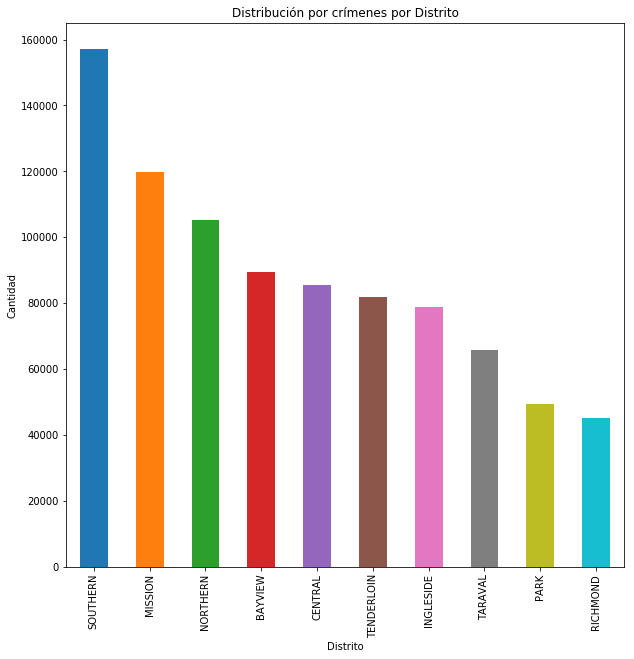

In [16]:
# Distribución de los crímens por distritos.

df.PdDistrict.value_counts().plot(kind='bar', figsize=((10,10)))
plt.title('Distribución por crímenes por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad')
plt.show()

    * La región SOUTHERN es el distrito con mayor registro de dlitos.

* Se obvsrva a continuación la distribución de los crímenes

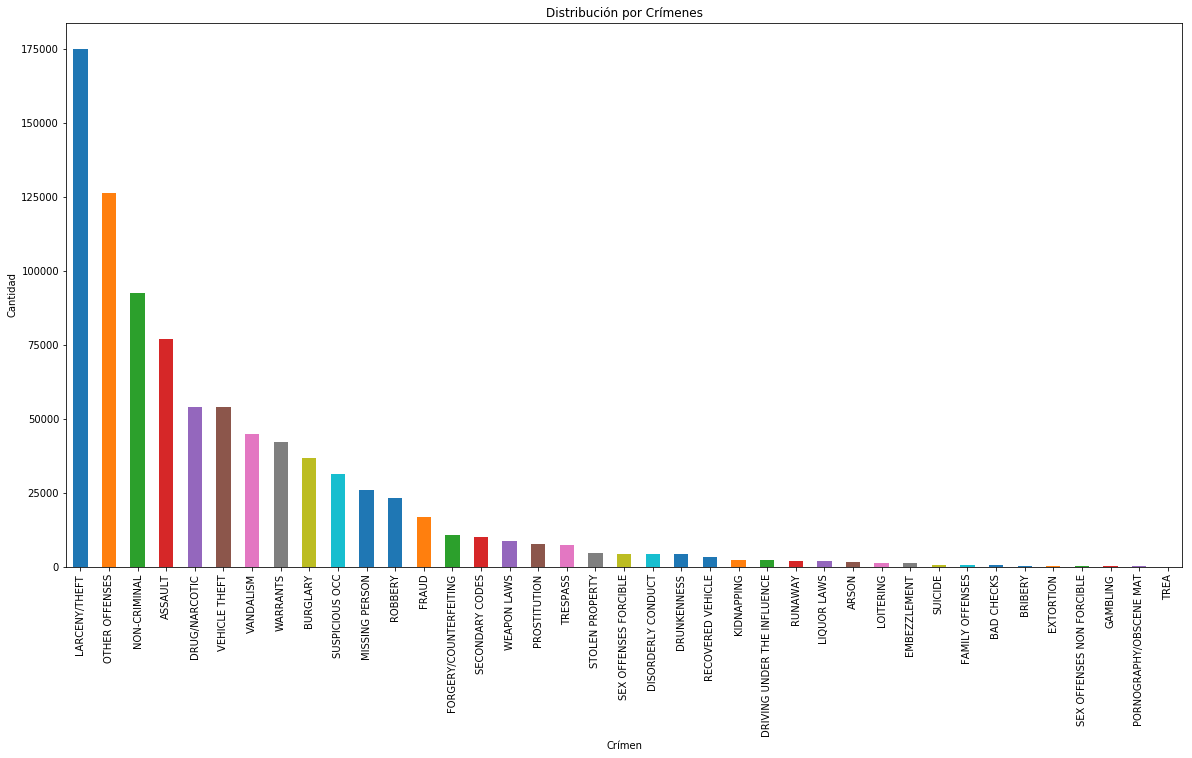

In [17]:
# Distribución de los crímenes

df.Category.value_counts().plot(kind='bar', figsize=((20,10)))
plt.title('Distribución por Crímenes')
plt.xlabel('Crímen')
plt.ylabel('Cantidad')
plt.show()

    * El crimen con mayor cantidad de registros es LARCENY/THEFT

* Se observa la distribución de crímenes según el día de la semana.

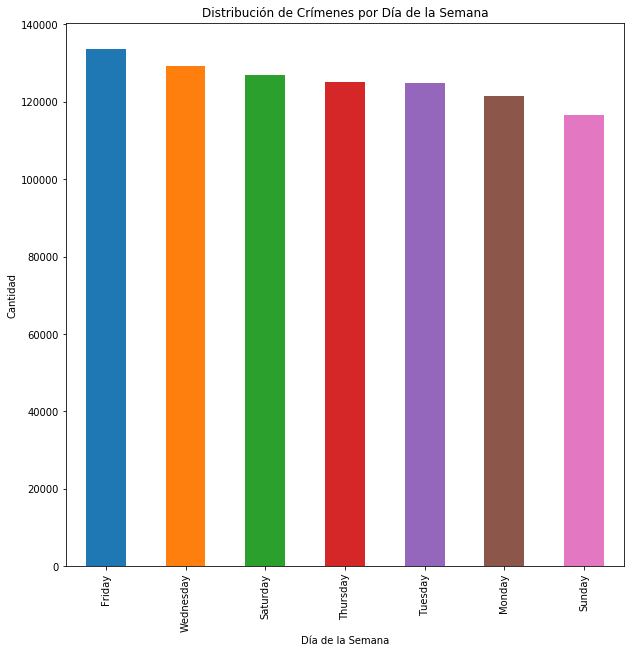

In [18]:
# Distribución de Crímenes por Día de la Semana

df.DayOfWeek.value_counts().plot(kind='bar', figsize=((10,10)))
plt.title('Distribución de Crímenes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad')
plt.show()

    * El día viernes es el día con mayor cantidad de registros de delitos.

* Se visualiza la distribución de los crímenes según la hora del día.

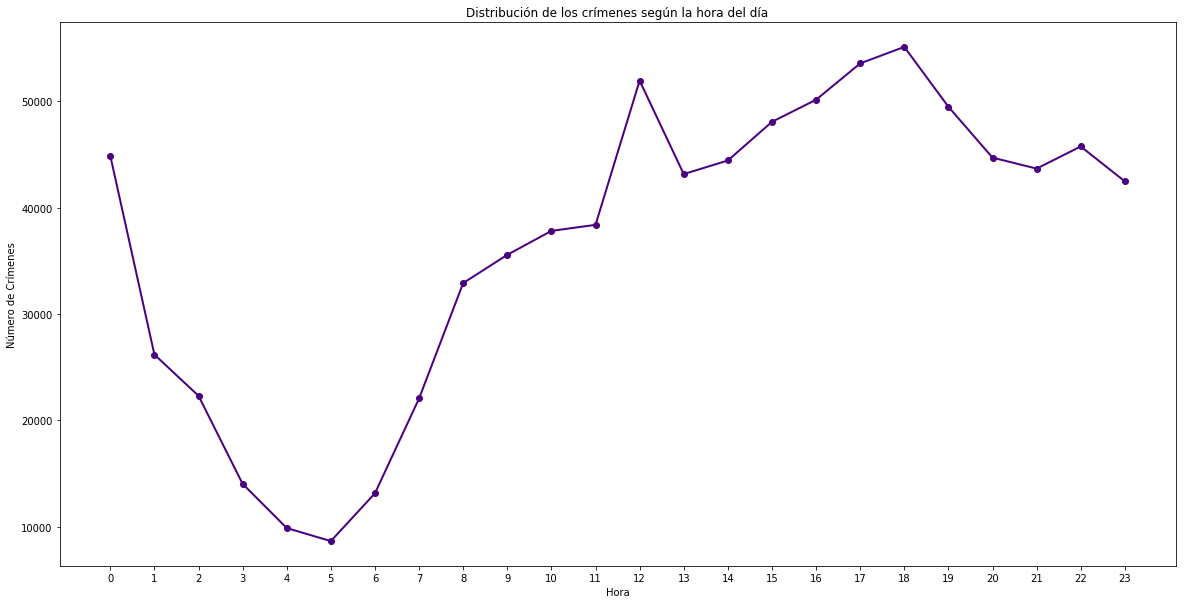

In [19]:
#  Datos agrupados por Hora
hours = df.groupby('Hour').size()
# Gráfica de los datos 
plt.figure(figsize=(20,10))
plt.plot(hours.values , 'bo-', color = 'indigo',linewidth=2)
plt.xticks(hours.index)
plt.title('Distribución de los crímenes según la hora del día')
plt.ylabel ('Número de Crímenes')
plt.xlabel ('Hora')
plt.show()

    * El horario en el que se reportan los crímenes presentan picos sobre el medio día y sobre las 5-6 de la tarde, que coincide con la hora de salida de los trabajadores. Sobre la madrugada, la reducción de reportes es considerable.

* Del mismo modo, se visualiza la distribución por mes.

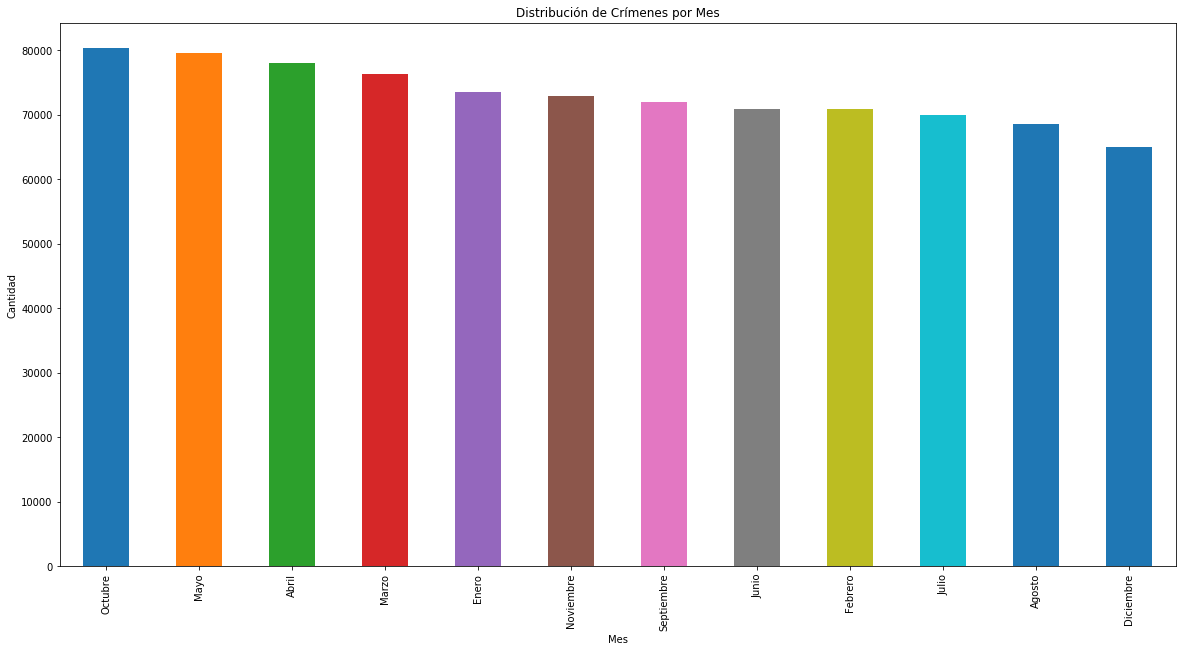

In [20]:
# Distribución de crímenes por mes
df.Month.value_counts().plot(kind='bar', figsize=((20,10)))
plt.title('Distribución de Crímenes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ['Octubre','Mayo','Abril','Marzo','Enero','Noviembre','Septiembre','Junio','Febrero','Julio','Agosto','Diciembre'])
plt.show()

    * El mes que registra mayor cantidad de crímenes es Octubre, y el menor Diciembre.

* Distribución según el día del mes

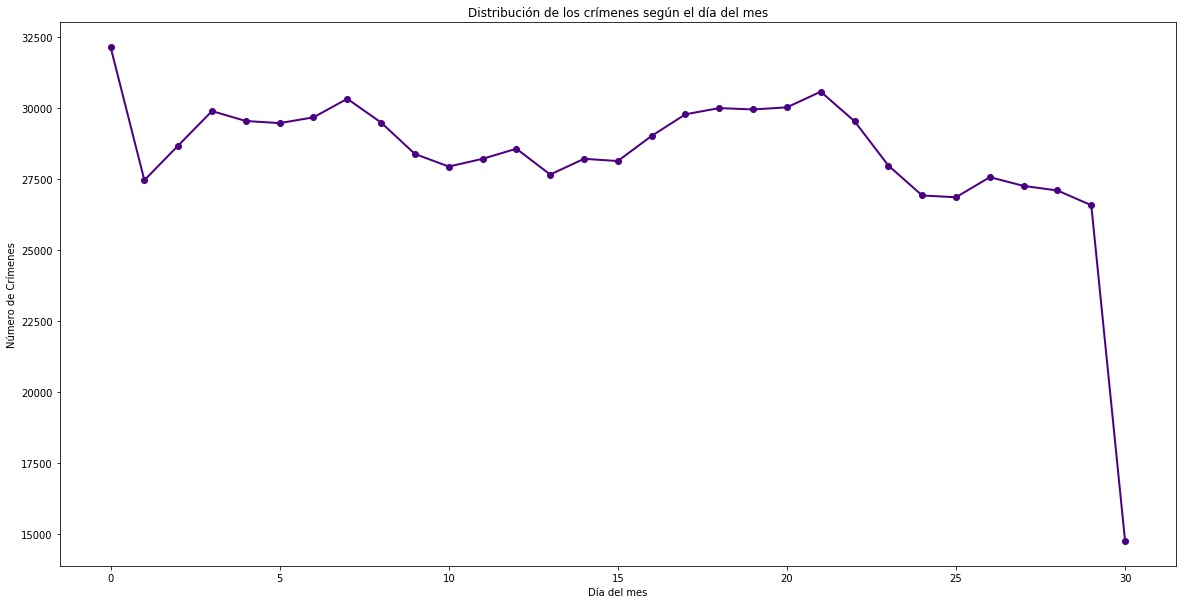

In [21]:
# Gráfica Crímenes según el día del mes

days = df[['Month','Day']].groupby(['Day']).size()
plt.figure(figsize=(20,10))
plt.plot(days.values , 'bo-', color = 'indigo',linewidth=2)
plt.title('Distribución de los crímenes según el día del mes')
plt.ylabel ('Número de Crímenes')
plt.xlabel ('Día del mes')
plt.show()

* La información de la ubicación se basará en los distritos. La visualización por medio de un mapa ayuda a crear una idea rápida y específica de la localización, en este caso, el crimen.

In [22]:
# Distribución Geográfica

## Serie con los crímnes agrupados por distrito
t = df.PdDistrict.value_counts()

## Se Crea un dataframe con la información de los distritos y se reorganizan los índices
table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

# Se crea el índice numérico y se renombra la columna a Districts
table = table.reset_index()
table.rename({'index': 'Districts'}, axis='columns', inplace=True)

# Gráfica del mapa

gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

# Visualización de la división en distritos policiales

sf_map.choropleth(geo_data=gjson, data=table, columns=['Districts', 'Count'], key_on='feature.properties.DISTRICT', fill_opacity=0.6,  line_opacity=0.9, legend_name='Crímenes en San Francisco')

sf_map

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


* Se consulta en la página de la policía de San Francisco a cerca de los distritos policiales. [1].

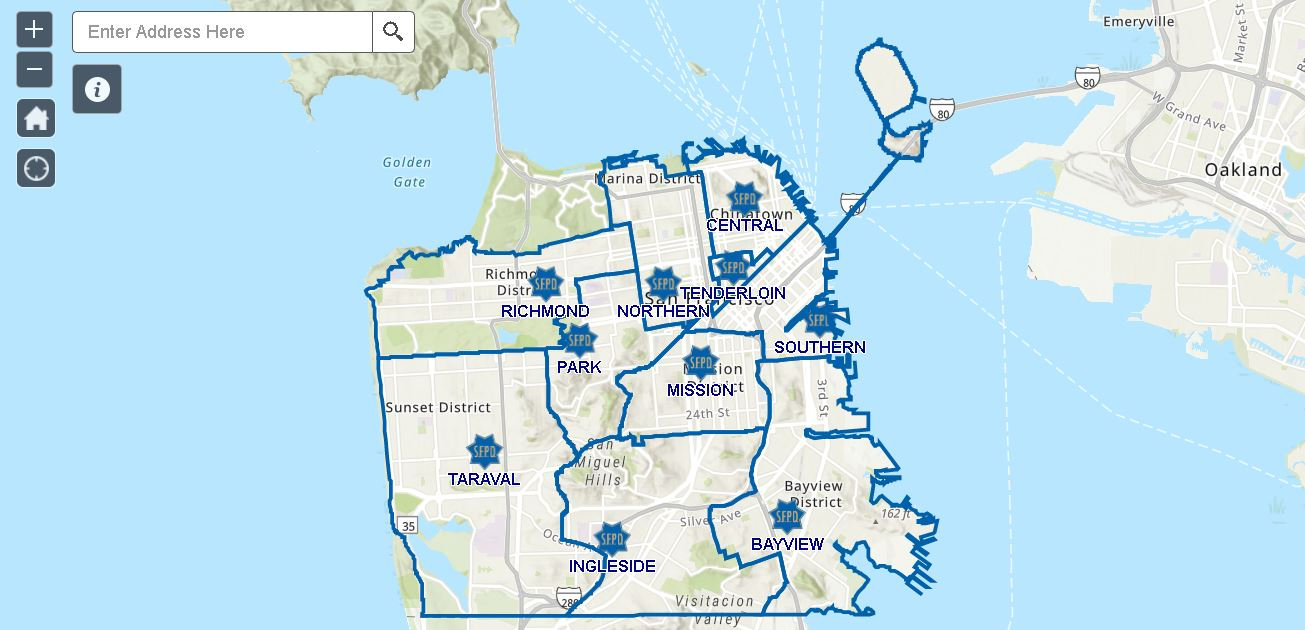

In [23]:
Image(filename=r'C:\Users\b55al\OneDrive\Escritorio\San Francisco.jpg',width="1000", height="300")

## Parte 3: Implementación del modelo

Por las condiciones del problema a resolver, se trabajará con un modelo de clasificación.

* Se procede a eliminar las columnas que no aportarán información al modelo y de las cuáles ya se ha extraido su valor.

In [24]:
# Se eliminan las variabls catgóricas
del (df['Date'])
del (df['Descript'], df['DayOfWeek'],df['PdDistrict'],df['Resolution'],df['Address'])



* Se divide el dataset en los datos de prueba y entrenamiento para ser utilizados en el modelo.

In [25]:
# Asignación de las variables de entrenamiento y de prueba

## El parámetro stratify permite conservar la proporción de los crímenes en ambos dataset.

train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['Category'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=df[df.columns[1:]]
Y=df['Category']

* Se obtiene la información de los dataset de prueba y entrenamiento

In [26]:
# Información dataset de entrenamiento (features)
(train_X).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614634 entries, 316567 to 199631
Columns: 919 entries, X to UNFOUNDED
dtypes: float64(2), int64(4), uint8(913)
memory usage: 568.0 MB


In [27]:
# Información dataset de entrenamiento (Variable Objetivo)
(train_Y).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614634 entries, 316567 to 199631
Data columns (total 1 columns):
Category    614634 non-null object
dtypes: object(1)
memory usage: 9.4+ MB


In [28]:
# Información del dataset de prueba (features)
(test_X).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263415 entries, 299918 to 511453
Columns: 919 entries, X to UNFOUNDED
dtypes: float64(2), int64(4), uint8(913)
memory usage: 243.4 MB


In [29]:
# Información del dataset de prueba (Variable Objetivo)
(test_X).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263415 entries, 299918 to 511453
Columns: 919 entries, X to UNFOUNDED
dtypes: float64(2), int64(4), uint8(913)
memory usage: 243.4 MB


* Se realiza la clasificación del modelo, al tratar de resolver un problema de clasificación, se opta por aplicar Random Forest por su capacidad de trabajar de manera adecuada con grandes volúmenes de datos.

* Se determinan los mejores parámetros del modelo de random forest por medio de GridSearch.

In [30]:
# Optimización de Hiperparámetros

n_estimators=range(90,110,10)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(train_X,train_Y.values.ravel())
print('Mejor puntaje: ', gd.best_score_)
print('Resultado mejor estimador: \n',gd.best_estimator_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 36.4min finished


Mejor puntaje:  0.9922376568819818
Resultado mejor estimador: 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


* Ya con los parámetros definidos, se procede a crear el predictor.

In [31]:
# Random Forest 

model=RandomForestClassifier(n_estimators=100, bootstrap = True, n_jobs= 2, random_state=0)
model.fit(train_X,train_Y.values.ravel())
prediction=model.predict(test_X)
print('La precisión del Random Forests es: ',metrics.accuracy_score(test_Y,prediction))

La precisión del Random Forests es:  0.9942562116811875


* Se puede visualizar las predicciones obtenidas del modelo:

In [32]:
prediction = pd.Series(prediction)
prediction.head()

0    SECONDARY CODES
1     OTHER OFFENSES
2        DRUNKENNESS
3      LARCENY/THEFT
4          VANDALISM
dtype: object

* Se prueba el modelo con los datos de entrenamiento.

In [33]:
# Puntuación con datos de entrenamiento

prediction77=model.predict(train_X)
precision_score(train_Y,prediction77,average = 'weighted')  # (Se le dará más peso a las categorías con mayor cantidad de registros)

0.9999822224825398

Validación Cruzada

* Se aplica esta validación para descartar efectos de overfiting

In [34]:
# Aplicar Validación Cruzada

cv_result = cross_val_score(model,train_X,train_Y.values.ravel(), cv = 4,scoring = "accuracy")
print(cv_result)
media = cv_result.mean()
des_std = cv_result.std()
print(' ')
print('Media de la validación: ', media)
print('Desviación de la validación: ', des_std)


[0.99303047 0.99271788 0.99377827 0.99276909]
 
Media de la validación:  0.9930739286620796
Desviación de la validación:  0.0004235803938683278


    * Los resultados no indican sobreentrenaminto.

Matriz de Confusión

* Se procede a obtener el número de clasificaciones correctas e incorrectas realizadas por el clasificador

Matriz de confusión
-------------------
[[  437     0     0 ...     0     0     2]
 [    0 22868     0 ...     1     0     2]
 [    0     0   121 ...     0     0     0]
 ...
 [    0     0     0 ... 16110     0     0]
 [    0     0     0 ...     0 12647     0]
 [    1     8     0 ...     0     1  2471]]



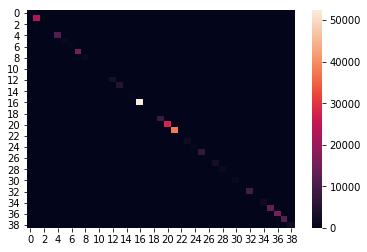

In [35]:
# Matriz de Confusión
mat_confusion = confusion_matrix(
                    y_true    = test_Y,
                    y_pred    = prediction
                )
print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")

sns.heatmap(confusion_matrix(test_Y,prediction))

In [36]:
# Precisión

# Capacidad del clasificador de no etiquetar como positiva una muestra que es negativa.

precision_score(test_Y,prediction,average = 'weighted')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9942903713563512

In [37]:
# Recall

# Capacidad del clasificador de encontrar todas las muestras positivas.

recall_score(test_Y,prediction,average = 'weighted')

0.9942562116811875

In [38]:
#f1_Score

# Promedio ponderado Precision y recall*

f1_score(test_Y,prediction,average = 'weighted')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9942262566866735

* Se muestran los valores obtenidos para cada categoría

In [39]:
print(
    classification_report(
        y_true = test_Y,
        y_pred = prediction
    )
)

                             precision    recall  f1-score   support

                      ARSON       0.99      0.96      0.98       454
                    ASSAULT       1.00      0.99      0.99     23063
                 BAD CHECKS       0.99      0.99      0.99       122
                    BRIBERY       1.00      0.87      0.93        87
                   BURGLARY       1.00      0.99      1.00     11027
         DISORDERLY CONDUCT       1.00      0.99      0.99      1296
DRIVING UNDER THE INFLUENCE       1.00      0.98      0.99       680
              DRUG/NARCOTIC       0.99      1.00      0.99     16191
                DRUNKENNESS       1.00      1.00      1.00      1284
               EMBEZZLEMENT       1.00      0.94      0.97       350
                  EXTORTION       1.00      0.90      0.95        77
            FAMILY OFFENSES       0.99      0.80      0.88       147
     FORGERY/COUNTERFEITING       0.99      0.99      0.99      3183
                      FRAUD      

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


    * Una vez que características de predicción del modelo han sido descritas, se procede a visualizar los resultados de la predicción.

### Resultados de la predicción

In [40]:
print('Resultados de la predicción: ')
print(prediction.head(10))
print(' ')
print('Datos de prueba: ')
print(test_Y.reset_index().head(10))

Resultados de la predicción: 
0    SECONDARY CODES
1     OTHER OFFENSES
2        DRUNKENNESS
3      LARCENY/THEFT
4          VANDALISM
5     SUSPICIOUS OCC
6           BURGLARY
7      DRUG/NARCOTIC
8           BURGLARY
9              FRAUD
dtype: object
 
Datos de prueba: 
    index         Category
0  299918  SECONDARY CODES
1  373805   OTHER OFFENSES
2  153191      DRUNKENNESS
3   15967    LARCENY/THEFT
4  214599        VANDALISM
5  481729   SUSPICIOUS OCC
6  647261         BURGLARY
7  411359    DRUG/NARCOTIC
8  815047         BURGLARY
9  436974            FRAUD


In [41]:
type(test_Y)
type(prediction)

pandas.core.series.Series

* Aquí se puede observar de mejor manera el paralelo de los datos Test y las predicciones.

In [42]:
a = prediction
b = test_Y
a = a.to_frame()
b.reset_index(drop=True, inplace=True)
df2 = b
df2 = pd.merge(df2,a, how='outer', left_index=True, right_index=True)
df2 = df2.rename(columns = {'Category': 'Test',0: 'Predicciones'})
df2

,Test,Predicciones
0,SECONDARY CODES,SECONDARY CODES
1,OTHER OFFENSES,OTHER OFFENSES
2,DRUNKENNESS,DRUNKENNESS
3,LARCENY/THEFT,LARCENY/THEFT
4,VANDALISM,VANDALISM
5,SUSPICIOUS OCC,SUSPICIOUS OCC
6,BURGLARY,BURGLARY
7,DRUG/NARCOTIC,DRUG/NARCOTIC
8,BURGLARY,BURGLARY
9,FRAUD,FRAUD


In [55]:
df2['Coincide'] = df2['Test'] == df2['Predicciones']
print(df2.groupby('Coincide').size())
print(' ')
df2.head()

Coincide
False      1513
True     261902
dtype: int64
 


,Test,Predicciones,Coincide
0,SECONDARY CODES,SECONDARY CODES,True
1,OTHER OFFENSES,OTHER OFFENSES,True
2,DRUNKENNESS,DRUNKENNESS,True
3,LARCENY/THEFT,LARCENY/THEFT,True
4,VANDALISM,VANDALISM,True


In [56]:
df2.to_csv('Test_Predicciones.csv')

    * Se agrega una tercera columna indicando si coínciden las prediccions o no. Finalmente se entregan las predicciones en un archivo csv.

Hasta aquí la creación del modelo de predicción del crimen.


Por Brayan Alfonso.

In [3]:
20000/28

714.2857142857143

In [ ]:
director de operación

planificar repartidores
-2 entregas/hora
-14 h
-

mañana 20000 pedidos
    

Referencias

[1]. https://www.sanfranciscopolice.org/your-sfpd/sfpd-stations/station-finder

[2]. https://www.interactivechaos.com/python/function/traintestsplit

[3]. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

[4]. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html